<a href="https://colab.research.google.com/github/Nisal-Sashmitha/DL-assignment/blob/IT20624330---Premathilaka-M.A.D.M/Vgg19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import zipfile

In [ ]:
# Set Kaggle API configuration directory

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle"

In [ ]:
# Navigate to Kaggle dataset directory in Google Drive
%cd /content/drive/MyDrive/Kaggle/

/content/drive/MyDrive/Kaggle


In [ ]:
# Download the dataset from Kaggle
!kaggle datasets download -d hasnainjaved/melanoma-skin-cancer-dataset-of-10000-images

 87% 86.0M/98.7M [00:00<00:00, 102MB/s] 
100% 98.7M/98.7M [00:01<00:00, 97.8MB/s]


In [ ]:
# List the files in the current directory
!ls

kaggle.json  melanoma-skin-cancer-dataset-of-10000-images.zip


In [ ]:
# Extract the downloaded dataset
zip_ref = zipfile.ZipFile("melanoma-skin-cancer-dataset-of-10000-images.zip")
zip_ref.extractall("/tmp")
zip_ref.close()

In [ ]:
import numpy as np
import os
import cv2
import shutil
import random as rn
from tqdm import tqdm
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.models import Model

In [ ]:
# Set the directories for the train and test data
train_dir = "/tmp/melanoma_cancer_dataset/train"
test_dir = "/tmp/melanoma_cancer_dataset/test"

In [ ]:
# List the contents of the train and test directories
print(os.listdir("/tmp/melanoma_cancer_dataset"))
print("Train classes", os.listdir(train_dir))
print("Test classes", os.listdir(test_dir))

['test', 'train']
Train classes ['benign', 'malignant']
Test classes ['benign', 'malignant']


In [ ]:
# Define batch size and image dimensions
batch_size = 32
img_height = 224
img_width = 224

In [ ]:
# Load and preprocess the training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 9605 files belonging to 2 classes.
Using 7684 files for training.


In [ ]:
# Load and preprocess the validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 9605 files belonging to 2 classes.
Using 1921 files for validation.


In [ ]:
# Get class names from the training dataset
class_names = train_ds.class_names
print(class_names)

['benign', 'malignant']


In [ ]:
# Visualize sample images from the training dataset
import matplotlib.pyplot as plt

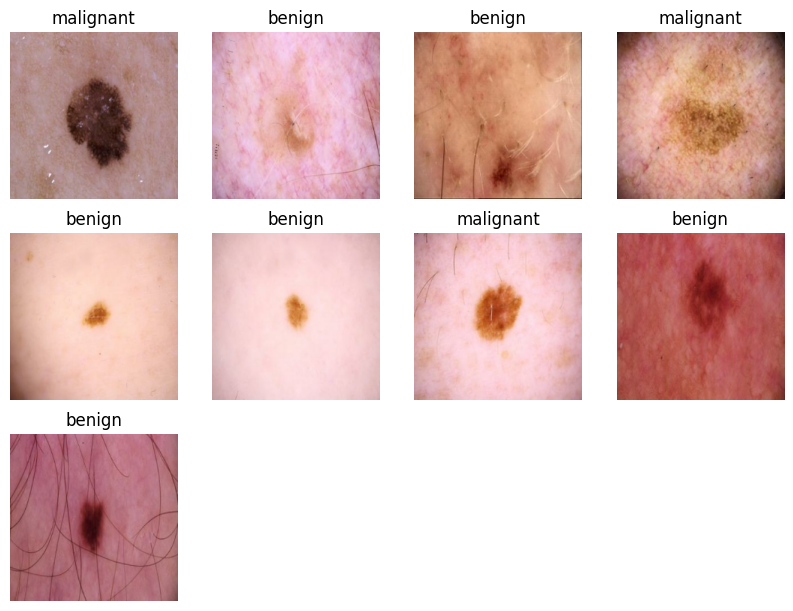

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for a in range(9):
        ax = plt.subplot(4, 4, a + 1)
        plt.imshow(images[a].numpy().astype("uint8"))
        plt.title(class_names[labels[a]])
        plt.axis("off")

In [ ]:
# Check the shape of image and label batches
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 224, 224, 3)
(32,)


In [ ]:
# Enable data prefetching for improved performance
AUTOTUNE = tf.data.AUTOTUNE

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
# Import VGG19 model and preprocess input
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input

In [ ]:
# Load the VGG19 model with pre-trained weights
vgg19 = VGG19(input_shape=(img_height, img_width, 3), weights='imagenet', include_top=False)
vgg19.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_3')>

In [ ]:
# Freeze the layers of the VGG19 model
for layer in vgg19.layers:
    layer.trainable = False

In [ ]:
# Define the number of classes
num_classes = 2

In [ ]:
# Create a custom classification head on top of VGG19
x = layers.Flatten()(vgg19.output)
prediction = layers.Dense(num_classes, activation='softmax')(x)

In [ ]:
# Create the final model
model = Model(inputs=vgg19.input, outputs=prediction)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
# Compile the model with loss and optimizer
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# Set the number of training epochs
epochs = 5

In [ ]:
# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    steps_per_epoch=5,
)

Epoch 1/5
5/5 [==============================] - 21s 3s/step - loss: 4.4818 - accuracy: 0.5750 - val_loss: 4.8183 - val_accuracy: 0.7064
Epoch 2/5
5/5 [==============================] - 10s 2s/step - loss: 5.4288 - accuracy: 0.7812 - val_loss: 3.0318 - val_accuracy: 0.8673
Epoch 3/5
5/5 [==============================] - 11s 3s/step - loss: 2.7266 - accuracy: 0.8500 - val_loss: 2.0105 - val_accuracy: 0.8813
Epoch 4/5
5/5 [==============================] - 11s 3s/step - loss: 1.1298 - accuracy: 0.8625 - val_loss: 2.2249 - val_accuracy: 0.8850
Epoch 5/5
5/5 [==============================] - 11s 3s/step - loss: 1.6053 - accuracy: 0.8750 - val_loss: 2.3217 - val_accuracy: 0.8928


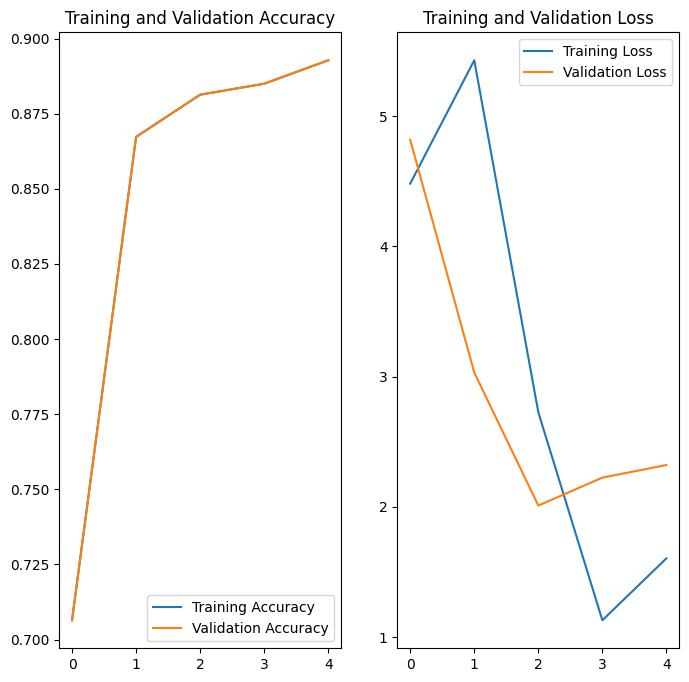

In [ ]:
# Retrieve training history for plotting
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot training and validation accuracy and loss
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, val_acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()